## Овечкина Лидия

Задание 1. Востановить параметры линейной регрессии (ее вид и веса) с использованием Pymc  

Задание 2. Найти для тестовых X значения y предсказанного для вашей отобраной регрессии.  

Каждое задание оценивается в 10 баллов  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [2]:
import scipy.stats as stats
import pymc as pm
import arviz as az

In [3]:
train_reg = pd.read_csv('regression/train_reg.csv')
test_reg = pd.read_csv('regression/test_reg.csv')

In [4]:
test_reg_x = np.array(test_reg['x'])
train_reg_x = np.array(train_reg['x'])
train_reg_y =  np.array(train_reg['y'])

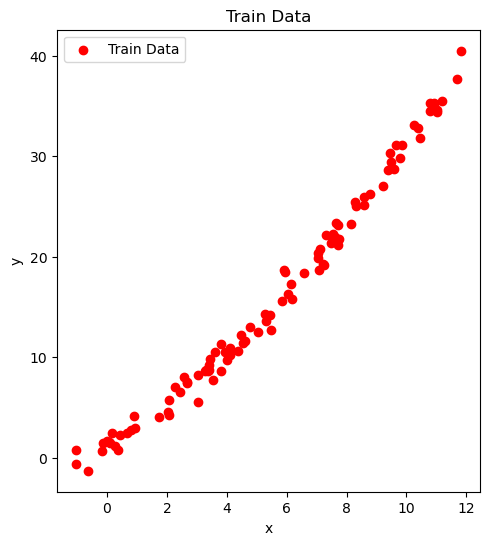

In [5]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 2)
plt.scatter(train_reg['x'], train_reg['y'], color='r', label='Train Data')
plt.title('Train Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

In [6]:
with pm.Model() as model:

    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta = pm.Normal('beta', mu=0, sigma=1)
    ε = pm.HalfNormal('ε', 10)

    mu = alpha + beta * train_reg_x
    y = pm.Normal('y', mu=mu, sigma=ε, observed=train_reg_y)

    trace = pm.sample(2000, tune=2000, chains=4, cores=4, target_accept=0.9)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, ε]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 17 seconds.


In [7]:
pm.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,-0.688,0.318,-1.296,-0.103,0.006,0.004,3166.0,3870.0,1.0
beta,3.081,0.049,2.992,3.180,0.001,0.001,3214.0,3746.0,1.0
ε,1.696,0.124,1.461,1.922,0.002,0.001,4716.0,4534.0,1.0


array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>],
       [<Axes: title={'center': 'ε'}>, <Axes: title={'center': 'ε'}>]],
      dtype=object)

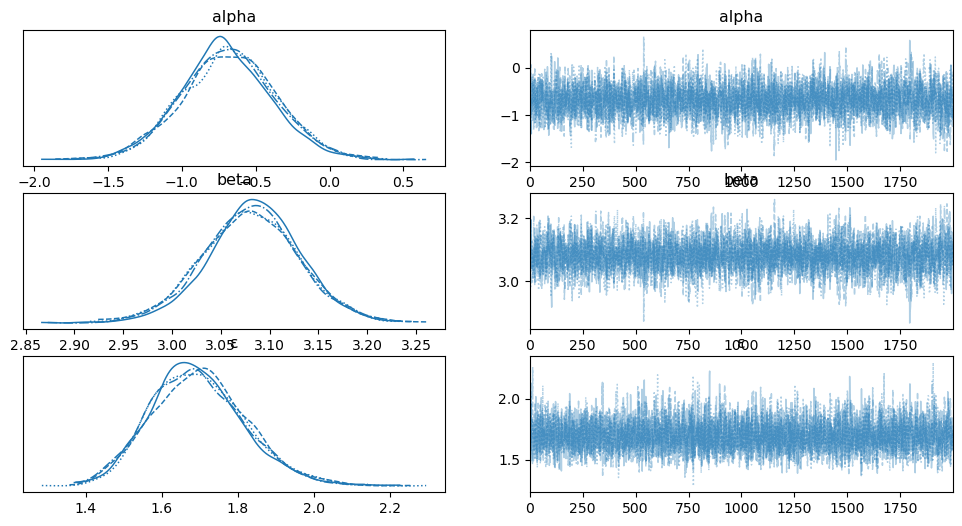

In [8]:
pm.plot_trace(trace)

In [9]:
alpha_estimated = np.mean(trace.posterior['alpha']).item()
beta_estimated = np.mean(trace.posterior['beta']).item()

In [10]:
def linear_regression(x, alpha, beta):
    return alpha + beta * x

In [11]:
print(f'Уравнение линейной регрессии:')
print(f'y = {float(alpha_estimated)} + {float(beta_estimated)} * x')

Уравнение линейной регрессии:
y = -0.6883214335223347 + 3.0813292528976497 * x


In [12]:
from sklearn.metrics import r2_score

r2_train = r2_score(train_reg_y, alpha_estimated + beta_estimated * train_reg_x)
print("R^2 для тренировочных данных:", r2_train)

R^2 для тренировочных данных: 0.977254667472208


In [13]:
y_predicted = linear_regression(test_reg_x, alpha_estimated, beta_estimated)
print("Предсказанные значения y для тестовых данных:")
print(y_predicted)

Предсказанные значения y для тестовых данных:
[17.53385276  7.50180516 -2.74122293 29.78999437 21.57188912 22.13602509
 12.88655085 25.43370471 28.16989337  5.58881053  6.28758506 28.51052316
 21.79606717  9.73983658 28.47711017 30.37067929 17.76404647 24.42973385
 17.50980634  5.10909747 24.7528516   7.33902148 24.21717835 21.10289718
 10.65163834  7.91525571 14.01824591 13.98666492 21.6884634  24.13188037
  1.90242623  1.35353601  8.4551414  11.37678923 21.27620596 21.17993581
 21.69397812 20.74704721 28.77435668  6.5054665   7.72450129 38.64464315
  8.3509722   1.18091322 20.78151951 33.84935882  2.53051391  1.3288868
 25.38949295 15.53821527 17.79849891 25.21149364 -1.01524478 21.20522212
 11.03412018 12.1160079  20.41513852 18.29350531 29.59820496 14.44353659
 28.2285562  17.11759882  2.76389964  1.83820004  6.60769847 13.51442735
  4.21484251 34.31575726 15.59374579 22.93224468  7.5619624  19.66823985
 28.39076365  7.10134718 11.45476278 20.53356761  8.59714176 21.10881845
 12.60

In [14]:
from sklearn.metrics import mean_squared_error
y_true = pd.read_csv('test_Y_true_reg.csv')
mean_squared_error(y_true, y_predicted)

2.36872910905218